# Analyzing the Data

### Import the libraries needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm

# Add the new data set

In [2]:
ultra_marathon_df = pd.read_csv('/Users/idsg/Desktop/Coding/daimil10/My_midterm/Midterm_Running/Data/UM_data_top_100.csv')

In [3]:
ultra_marathon_df = ultra_marathon_df.drop(columns=["Unnamed: 0"])

## Analyzing the Data

### Does elevation average of states or elevation gain have a factor in race times?

In [4]:
state_elevation_gain_df = ultra_marathon_df.groupby('state_code')['Elevation Gain (feet)'].mean().reset_index()
state_mph_df = ultra_marathon_df.groupby('state_code')['mph'].mean().reset_index()

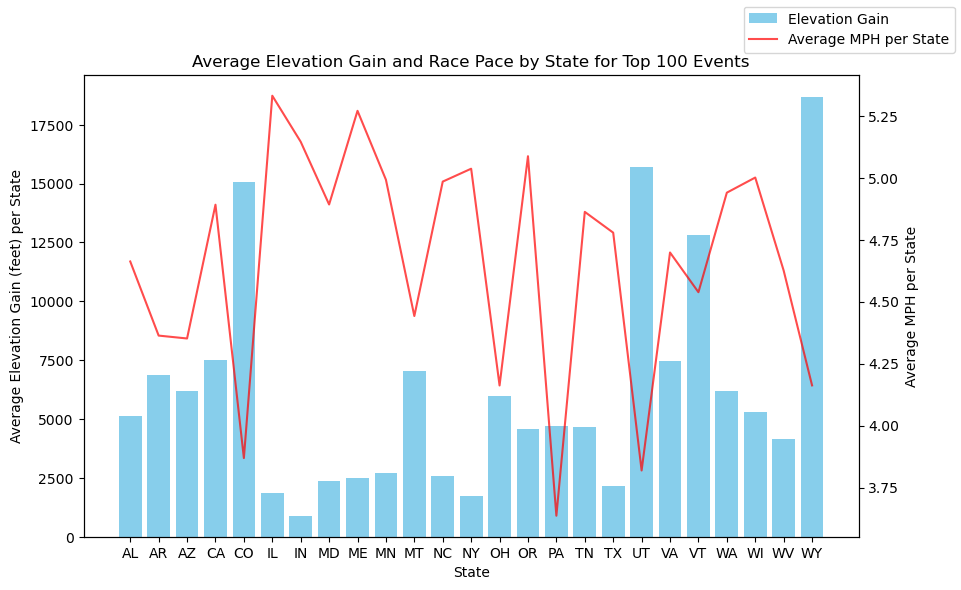

In [5]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(state_elevation_gain_df['state_code'], state_elevation_gain_df['Elevation Gain (feet)'], color='skyblue', label='Elevation Gain')
ax2 = ax1.twinx()
ax2.plot(state_mph_df['state_code'], state_mph_df['mph'], color='red', label='Average MPH per State', alpha=.7)
ax1.set_xlabel('State')
ax1.set_ylabel('Average Elevation Gain (feet) per State')
ax2.set_ylabel('Average MPH per State')
plt.title('Average Elevation Gain and Race Pace by State for Top 100 Events')
fig.legend()
plt.show()

In [6]:
state_state_elevation_df = ultra_marathon_df.groupby('state_code')['Average state elevation (feet)'].mean().reset_index()

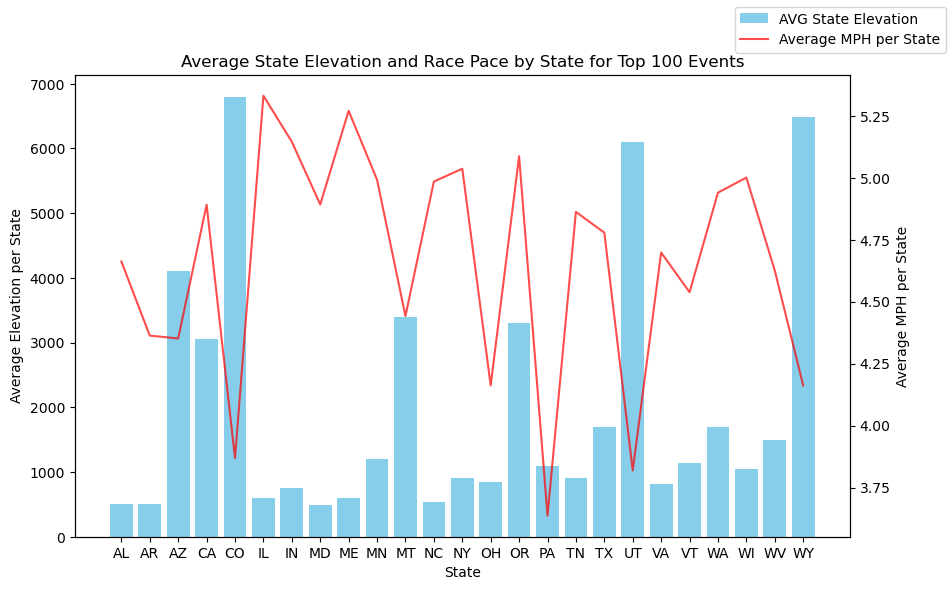

In [7]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(state_state_elevation_df['state_code'], state_state_elevation_df['Average state elevation (feet)'], color='skyblue', label='AVG State Elevation')
ax2 = ax1.twinx()
ax2.plot(state_mph_df['state_code'], state_mph_df['mph'], color='red', label='Average MPH per State', alpha=.7)
ax1.set_xlabel('State')
ax1.set_ylabel('Average Elevation per State')
ax2.set_ylabel('Average MPH per State')
plt.title('Average State Elevation and Race Pace by State for Top 100 Events')
fig.legend()
plt.show()

### Show maximum race pace per state versus elevation gain of race

In [8]:
state_max_mph_df = ultra_marathon_df.groupby('state_code')['mph'].max().reset_index()

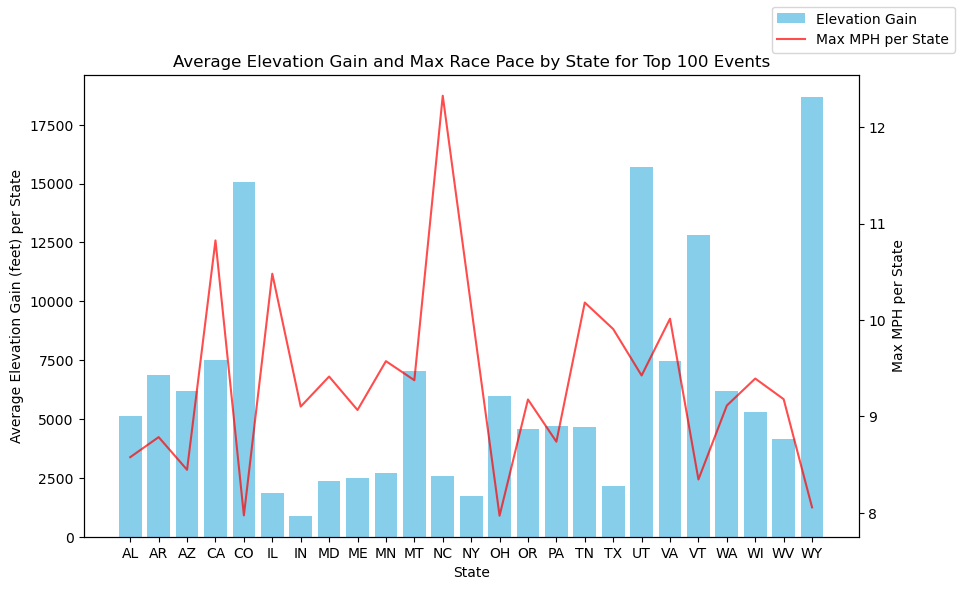

In [9]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(state_elevation_gain_df['state_code'], state_elevation_gain_df['Elevation Gain (feet)'], color='skyblue', label='Elevation Gain')
ax2 = ax1.twinx()
ax2.plot(state_max_mph_df['state_code'], state_max_mph_df['mph'], color='red', label='Max MPH per State', alpha=.7)
ax1.set_xlabel('State')
ax1.set_ylabel('Average Elevation Gain (feet) per State')
ax2.set_ylabel('Max MPH per State')
plt.title('Average Elevation Gain and Max Race Pace by State for Top 100 Events')
fig.legend()
plt.show()

### Show race pace versus total participants per year in a line plot

In [10]:
athlete_counts_per_year = ultra_marathon_df.groupby('Year of event')['Athlete ID'].nunique().T
# use in bar chart

In [11]:
min_pace_per_year = ultra_marathon_df.groupby('Year of event')['mph'].min().T
max_pace_per_year = ultra_marathon_df.groupby('Year of event')['mph'].max().T

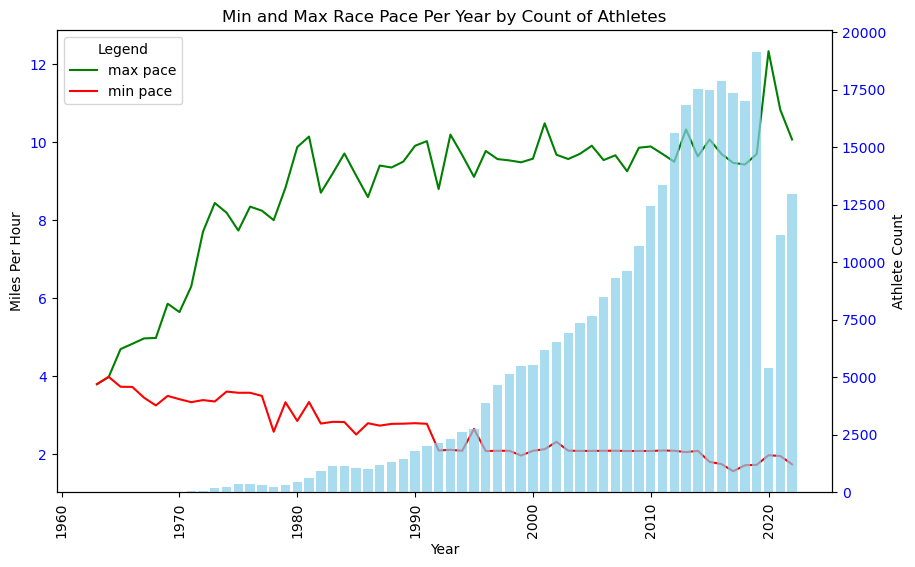

In [30]:
fix, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(max_pace_per_year, color='green', label ='max pace')
ax1.plot(min_pace_per_year, color='red', label='min pace')

ax1.set_xlabel('Year')
ax1.set_ylabel('Miles Per Hour')
ax1.tick_params(axis='y', labelcolor='b')
plt.legend(loc='upper left', title='Legend')
plt.xticks(rotation=90)
ax2 = ax1.twinx()
ax2.bar(athlete_counts_per_year.index, height=athlete_counts_per_year, color = 'skyblue',alpha=.7)
ax2.set_ylabel('Athlete Count')
ax2.tick_params(axis='y', labelcolor='b')
plt.title('Min and Max Race Pace Per Year by Count of Athletes')

plt.show()

### Visually, where are the states located with average race pace that are higher?  Show on a map.

In [13]:
# fig = px.choropleth(state_elevation_gain,
#                     locations='state_code',
#                     locationmode='USA-states',
#                     color='Elevation Gain (feet)',
#                     color_continuous_scale='Viridis',
#                     scope='usa',
#                     labels={'Elevation Gain (feet)': 'Average Elevation Gain (feet)'},
#                     title="Average Elevation Gain for the Top 100 Ultra Marathon Events"
#                     )
# fig.add_scattergeo(
#     locations=ca_md_df_filtered['state_code'],
#     locationmode='USA-states',
#     text=ca_md_df_filtered['state_code'],
#     mode='markers',
#     marker=dict(size=10, color='red'),
#     name='Key Points'
# )
# fig.update_geos(
#     visible=False,  # Hide all borders
#     projection_type="albers usa",
#     showcountries=True,
#     countrycolor="lightgray",
#     showlakes=True,
#     lakecolor="lightblue",
#     subunitcolor="white",
#     subunitwidth=0.5,
#     showland=True,
#     landcolor="white",
#     showocean=True,
#     oceancolor="lightblue",
#     showframe=False,
#     framecolor="lightgray",
#     showcoastlines=True,
#     coastlinecolor="lightgray"
# )

# fig.update_layout(
#     width=800,
#     height=600,
#     title={
#         'text': 'Average Elevation Gain for the Top 100 Ultra Marathon Events',
#         'y': 0.95,
#         'x': 0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'
#     },
#     coloraxis_colorbar=dict(
#         orientation='h',
#         x=0.5,
#         y=-0.2,
#         xanchor='center',
#         yanchor='top',
#         title=dict(
#             text='Average Elevation Gain (feet)',
#             side='bottom'
#         )
#     )
# )
# fig.update_geos(fitbounds="locations")
# fig.show()

### Is age associated to running faster with elevation gain?

In [14]:
true_age_df = ultra_marathon_df[ultra_marathon_df['true age'] < 100]


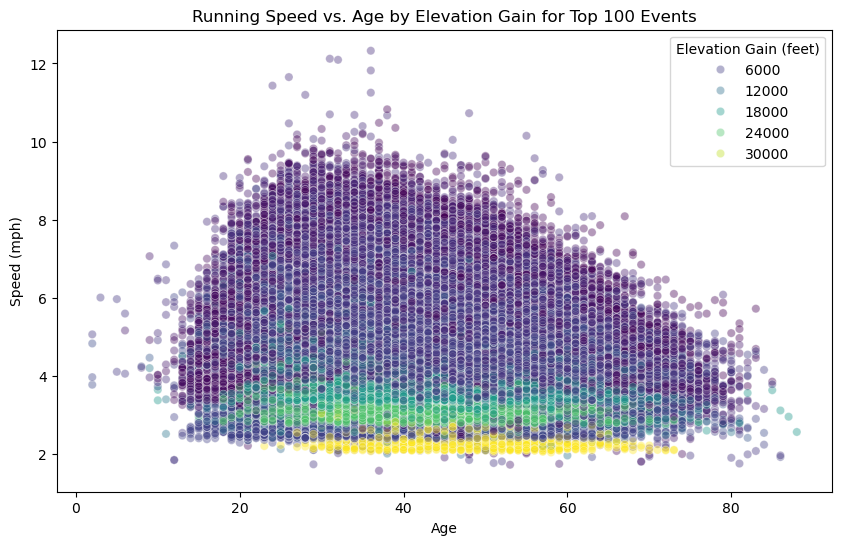

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=true_age_df['true age'], y=true_age_df['mph'], hue=true_age_df['Elevation Gain (feet)'], data=true_age_df, palette='viridis', alpha=.4)
plt.title('Running Speed vs. Age by Elevation Gain for Top 100 Events')
plt.xlabel('Age')
plt.ylabel('Speed (mph)')
plt.legend(title = 'Elevation Gain (feet)')
plt.show()

### What is the age of the fastest running time per minimum and maximum elevation gain by state?